### Model BUilding 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eda_data.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [3]:
# choose relevant columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [4]:
df_model = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided',
            'job_state', 'same_state', 'age', 'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'avg_salary']]

In [5]:
# get dummy variable
df_dum = pd.get_dummies(df_model, dtype=int)

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [7]:
X_train

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
187,3.0,0,0,0,1,5,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
203,3.3,0,0,0,1,56,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
513,3.9,3,0,0,0,190,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
88,4.2,0,0,0,1,12,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
354,3.3,3,0,0,0,108,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3.9,3,0,0,0,20,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
401,3.8,3,0,0,1,55,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
343,2.6,0,0,0,1,36,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
192,4.4,0,0,0,1,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
# multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)

In [9]:
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.47e-94
Time:                        23:24:25   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [13]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-21.587286448330445

In [36]:
# lasso regression
lm_l = Lasso(alpha=0.12)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-20.28330654298715

In [17]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))

/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+01, tolerance: 5.663e+01
  model = cd_fast.enet_coordinate_descent(
/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.524e+03, tolerance: 5.685e+01
  model = cd_fast.enet_coordinate_descent(
/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

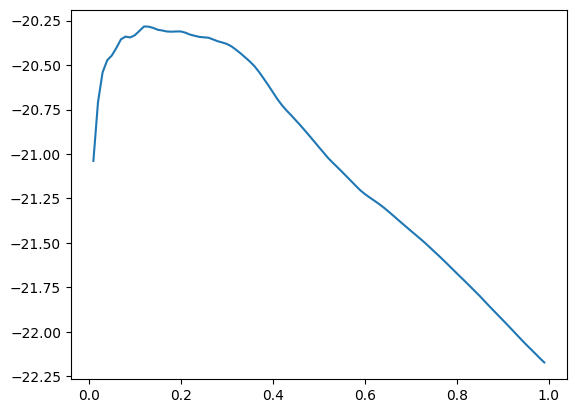

In [18]:
plt.plot(alpha, error)

In [19]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
11,0.12,-20.283307


In [21]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-16.531575014100397

In [22]:
# tune model using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ['friedman_mse'], 'max_features': ('auto', 'sqrt', 'log2')}

In [32]:
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
87 fits failed out of a total of 261.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/johnadi/data-science/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [34]:
gs.best_score_

-16.10475630310656

In [35]:
gs.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=130)

In [37]:
# test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

20.093456068352296

In [40]:
mean_absolute_error(y_test, tpred_lml)

18.718871938800653

In [41]:
mean_absolute_error(y_test, tpred_rf)

12.677671657201858

In [44]:
mean_absolute_error(y_test, (tpred_lm + tpred_rf)/2)

15.36685360962974